In [3]:
%config IPCompleter.greedy=True

import pandas as pd
import scipy.stats as st
import numpy as np
import json

In [4]:
with open('../Models/HaulCycle-V5/Inputs/FRO_wenco_FRO_01222020_50.geojson') as f:
    road_network = json.load(f)
from pandas import json_normalize
road_network_df = json_normalize(road_network["features"])
road_network_df.head()

,type,properties.source,properties.target,properties.road_id,properties.curve,properties.curve_angle,properties.curve_radius,properties.switchback,properties.intersection,properties.ending,properties.grade,properties.ramp,properties.id,properties.zones,geometry.type,geometry.coordinates
0,Feature,123beacon,Eag986,0,None,0.000000,0,NaN,False,True,1.778540,False,1767,EAGLE,MultiLineString,"[[[654110.9301, 5562445.2613, 1819.713], [6541..."
1,Feature,123beacon,Eag986,0,None,9.535716,55.7607718693757,0.0,False,False,0.620253,False,1768,EAGLE,MultiLineString,"[[[654139.0088629882, 5562486.864863542, 1818...."
2,Feature,123beacon,Eag986,0,None,15.149002,39.10937828611382,0.0,False,False,1.523012,False,1652,EAGLE,MultiLineString,"[[[654171.0195518098, 5562525.313548873, 1819...."
3,Feature,123beacon,Eag986,0,None,18.047015,37.65026091351709,0.0,False,False,0.207892,False,1430,EAGLE,MultiLineString,"[[[654211.4583031116, 5562555.689801627, 1819...."
4,Feature,123beacon,Eag986,0,None,21.083716,28.03219112712691,0.0,False,False,0.205038,False,1511,EAGLE,MultiLineString,"[[[654256.9496738013, 5562572.177849036, 1819...."


In [5]:
road_network_df = road_network_df[road_network_df.astype(str)['geometry.coordinates'] != '[]']
coords = 'geometry.coordinates'

road_network_structured = (road_network_df[coords].apply(lambda r: [(i[0],i[1],i[2]) for i in r[0]])
           .apply(pd.Series).stack()
           .reset_index(level=1).rename(columns={0:coords,"level_1":"point"})
           .join(road_network_df.drop(coords,1), how='left')).reset_index(level=0)

road_network_structured[['x0','y0','z0']] = road_network_structured[coords].apply(pd.Series)
road_network_structured.head(10)

,index,point,geometry.coordinates,type,properties.source,properties.target,properties.road_id,properties.curve,properties.curve_angle,properties.curve_radius,...,properties.intersection,properties.ending,properties.grade,properties.ramp,properties.id,properties.zones,geometry.type,x0,y0,z0
0,0,0,"(654110.9301, 5562445.2613, 1819.713)",Feature,123beacon,Eag986,0,None,0.000000,0,...,False,True,1.778540,False,1767,EAGLE,MultiLineString,654110.930100,5.562445e+06,1819.713
1,0,1,"(654116.8635920378, 5562453.580997841, 1818.256)",Feature,123beacon,Eag986,0,None,0.000000,0,...,False,True,1.778540,False,1767,EAGLE,MultiLineString,654116.863592,5.562454e+06,1818.256
2,0,2,"(654122.6164439849, 5562462.02250445, 1817.988)",Feature,123beacon,Eag986,0,None,0.000000,0,...,False,True,1.778540,False,1767,EAGLE,MultiLineString,654122.616444,5.562462e+06,1817.988
3,0,3,"(654128.0932391672, 5562470.389878118, 1817.814)",Feature,123beacon,Eag986,0,None,0.000000,0,...,False,True,1.778540,False,1767,EAGLE,MultiLineString,654128.093239,5.562470e+06,1817.814
4,0,4,"(654133.5031353545, 5562478.675949908, 1817.99)",Feature,123beacon,Eag986,0,None,0.000000,0,...,False,True,1.778540,False,1767,EAGLE,MultiLineString,654133.503135,5.562479e+06,1817.990
5,0,5,"(654139.0088629882, 5562486.864863542, 1818.053)",Feature,123beacon,Eag986,0,None,0.000000,0,...,False,True,1.778540,False,1767,EAGLE,MultiLineString,654139.008863,5.562487e+06,1818.053
6,1,0,"(654139.0088629882, 5562486.864863542, 1818.053)",Feature,123beacon,Eag986,0,None,9.535716,55.7607718693757,...,False,False,0.620253,False,1768,EAGLE,MultiLineString,654139.008863,5.562487e+06,1818.053
7,1,1,"(654144.7314785657, 5562494.933064075, 1818.018)",Feature,123beacon,Eag986,0,None,9.535716,55.7607718693757,...,False,False,0.620253,False,1768,EAGLE,MultiLineString,654144.731479,5.562495e+06,1818.018
8,1,2,"(654150.7551180264, 5562502.850286567, 1818.019)",Feature,123beacon,Eag986,0,None,9.535716,55.7607718693757,...,False,False,0.620253,False,1768,EAGLE,MultiLineString,654150.755118,5.562503e+06,1818.019
9,1,3,"(654157.1317501353, 5562510.580544776, 1818.223)",Feature,123beacon,Eag986,0,None,9.535716,55.7607718693757,...,False,False,0.620253,False,1768,EAGLE,MultiLineString,654157.131750,5.562511e+06,1818.223


In [6]:
road_network_structured.describe().T

,count,mean,std,min,25%,50%,75%,max
index,7011.0,5.783524e+02,334.760291,0.000000e+00,2.880000e+02,5.790000e+02,8.675000e+02,1.158000e+03
point,7011.0,2.541292e+00,1.756455,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
properties.road_id,7011.0,3.976137e+01,20.971436,0.000000e+00,2.400000e+01,4.200000e+01,6.000000e+01,6.900000e+01
properties.curve_angle,7011.0,5.757336e+00,9.070102,0.000000e+00,8.606908e-01,2.652483e+00,6.793582e+00,7.151617e+01
properties.switchback,6159.0,2.321805e-02,0.150608,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
properties.grade,6957.0,5.079679e+00,4.922873,4.074846e-02,1.406430e+00,4.728054e+00,7.693305e+00,7.372236e+01
properties.id,7011.0,8.210814e+02,503.331913,3.000000e+00,3.870000e+02,7.930000e+02,1.176000e+03,1.781000e+03
x0,7011.0,6.513408e+05,1577.042473,6.489420e+05,6.500014e+05,6.511685e+05,6.522070e+05,6.552573e+05
y0,7011.0,5.562496e+06,2068.698787,5.557506e+06,5.561441e+06,5.562278e+06,5.563832e+06,5.567099e+06
z0,7011.0,1.773935e+03,177.345085,-1.000000e+00,1.719657e+03,1.762730e+03,1.836130e+03,2.029422e+03


In [7]:
road_network_simple = road_network_structured.groupby('properties.id',as_index=False).agg({'x0':['first','last'],'y0':['first','last'],'z0':['first','last']})
road_network_simple.columns = road_network_simple.columns.map('_'.join)
road_network_simple.rename(columns={'properties.id_':'index','x0_first':'x0','y0_first':'y0','z0_first':'z0'
                                   ,'x0_last':'x1','y0_last':'y1','z0_last':'z1'},inplace=True)
road_network_simple.head(10)

,index,x0,x1,y0,y1,z0,z1
0,3,654352.154079,654379.163764,5.562555e+06,5.562514e+06,1819.4459,1820.4939
1,4,654400.248725,654421.251494,5.562467e+06,5.562422e+06,1819.9459,1820.8150
2,5,649696.458569,649679.536594,5.564814e+06,5.564767e+06,1797.4630,1801.9050
3,6,649679.536594,649663.281291,5.564767e+06,5.564720e+06,1801.9050,1806.1279
4,7,649575.280929,649552.470985,5.564541e+06,5.564496e+06,1824.0139,1828.0599
5,8,649516.243055,649498.332600,5.564403e+06,5.564335e+06,1832.6420,1835.6230
6,9,649957.998869,649976.703145,5.565498e+06,5.565544e+06,1849.3910,1852.9790
7,10,649898.741045,649918.790403,5.565360e+06,5.565406e+06,1835.0480,1840.2410
8,11,649860.578427,649879.105243,5.565267e+06,5.565313e+06,1825.7320,1829.5180
9,19,649008.330048,649054.783123,5.564106e+06,5.564125e+06,1915.3979,1915.4659


In [8]:
road_network_structured = road_network_structured.groupby('properties.id').first()
road_network_structured['x1'] = road_network_structured.groupby('properties.id')['x0'].shift(-1)
road_network_structured['y1'] = road_network_structured.groupby('properties.id')['y0'].shift(-1)
road_network_structured['z1'] = road_network_structured.groupby('properties.id')['z0'].shift(-1)
#road_network_structured = road_network_structured[(road_network_structured.x1 > 0) & (road_network_structured.y1 > 0)]
road_network_structured.head()

,index,point,geometry.coordinates,type,properties.source,properties.target,properties.road_id,properties.curve,properties.curve_angle,properties.curve_radius,...,properties.grade,properties.ramp,properties.zones,geometry.type,x0,y0,z0,x1,y1,z1
properties.id,,,,,,,,,,,,,,,,,,,,,
3,6,0,"(654352.1540788078, 5562554.67523438, 1819.4459)",Feature,123beacon,Eag986,0,None,21.711297,100.2753478836383,...,1.555459,False,EAGLE,MultiLineString,654352.154079,5.562555e+06,1819.4459,NaN,NaN,NaN
4,8,0,"(654400.2487251802, 5562467.387377807, 1819.9459)",Feature,123beacon,Eag986,0,None,3.019670,68.96176974811556,...,1.126952,False,EAGLE,MultiLineString,654400.248725,5.562467e+06,1819.9459,NaN,NaN,NaN
5,20,0,"(649696.4585687439, 5564814.498520078, 1797.463)",Feature,LKM011,LKM013,2,None,6.242138,1027.329394883421,...,9.006365,True,SWIFT,MultiLineString,649696.458569,5.564814e+06,1797.4630,NaN,NaN,NaN
6,21,0,"(649679.5365942591, 5564766.99684611, 1801.905)",Feature,LKM011,LKM013,2,None,1.783322,38.94171821979718,...,8.779687,True,SWIFT,MultiLineString,649679.536594,5.564767e+06,1801.9050,NaN,NaN,NaN
7,26,0,"(649575.2809285668, 5564540.576639692, 1824.0139)",Feature,LKM011,LKM013,2,None,2.652483,61.34750139602065,...,8.286849,True,SWIFT,MultiLineString,649575.280929,5.564541e+06,1824.0139,NaN,NaN,NaN


In [9]:
nodes_df = road_network_simple[['x1','y1','z1']].rename(columns={'x1':'x0','y1':'y0','z1':'z0'})
nodes_df = pd.concat([nodes_df,road_network_simple[['x0','y0','z0']]],axis=0)
nodes_df.drop_duplicates(keep = 'first', inplace = True)
nodes_df.reset_index(inplace = True, drop=True)
nodes_df.reset_index(inplace = True)
nodes_df.to_clipboard()
nodes_df.head()

,index,x0,y0,z0
0,0,654379.163764,5.562514e+06,1820.4939
1,1,654421.251494,5.562422e+06,1820.8150
2,2,649679.536594,5.564767e+06,1801.9050
3,3,649663.281291,5.564720e+06,1806.1279
4,4,649552.470985,5.564496e+06,1828.0599


In [10]:
paths_df = road_network_simple[['x0','y0','z0','x1','y1','z1']].copy()
paths_df = paths_df.merge(nodes_df,left_on=['x0','y0','z0'],right_on=['x0','y0','z0'])
paths_df = paths_df.merge(nodes_df,left_on=['x1','y1','z1'],right_on=['x0','y0','z0'])
#paths_df.drop(columns=['x0_x','y0_x','z0_x','x1','y1','z1','x0_y','y0_y','z0_y'],inplace=True)
paths_df.to_clipboard()
paths_df.head()

,x0_x,y0_x,z0_x,x1,y1,z1,index_x,index_y,x0_y,y0_y,z0_y
0,654352.154079,5.562555e+06,1819.4459,654379.163764,5.562514e+06,1820.4939,951,0,654379.163764,5.562514e+06,1820.4939
1,654400.248725,5.562467e+06,1819.9459,654421.251494,5.562422e+06,1820.8150,319,1,654421.251494,5.562422e+06,1820.8150
2,649696.458569,5.564814e+06,1797.4630,649679.536594,5.564767e+06,1801.9050,321,2,649679.536594,5.564767e+06,1801.9050
3,649679.536594,5.564767e+06,1801.9050,649663.281291,5.564720e+06,1806.1279,2,3,649663.281291,5.564720e+06,1806.1279
4,649575.280929,5.564541e+06,1824.0139,649552.470985,5.564496e+06,1828.0599,326,4,649552.470985,5.564496e+06,1828.0599


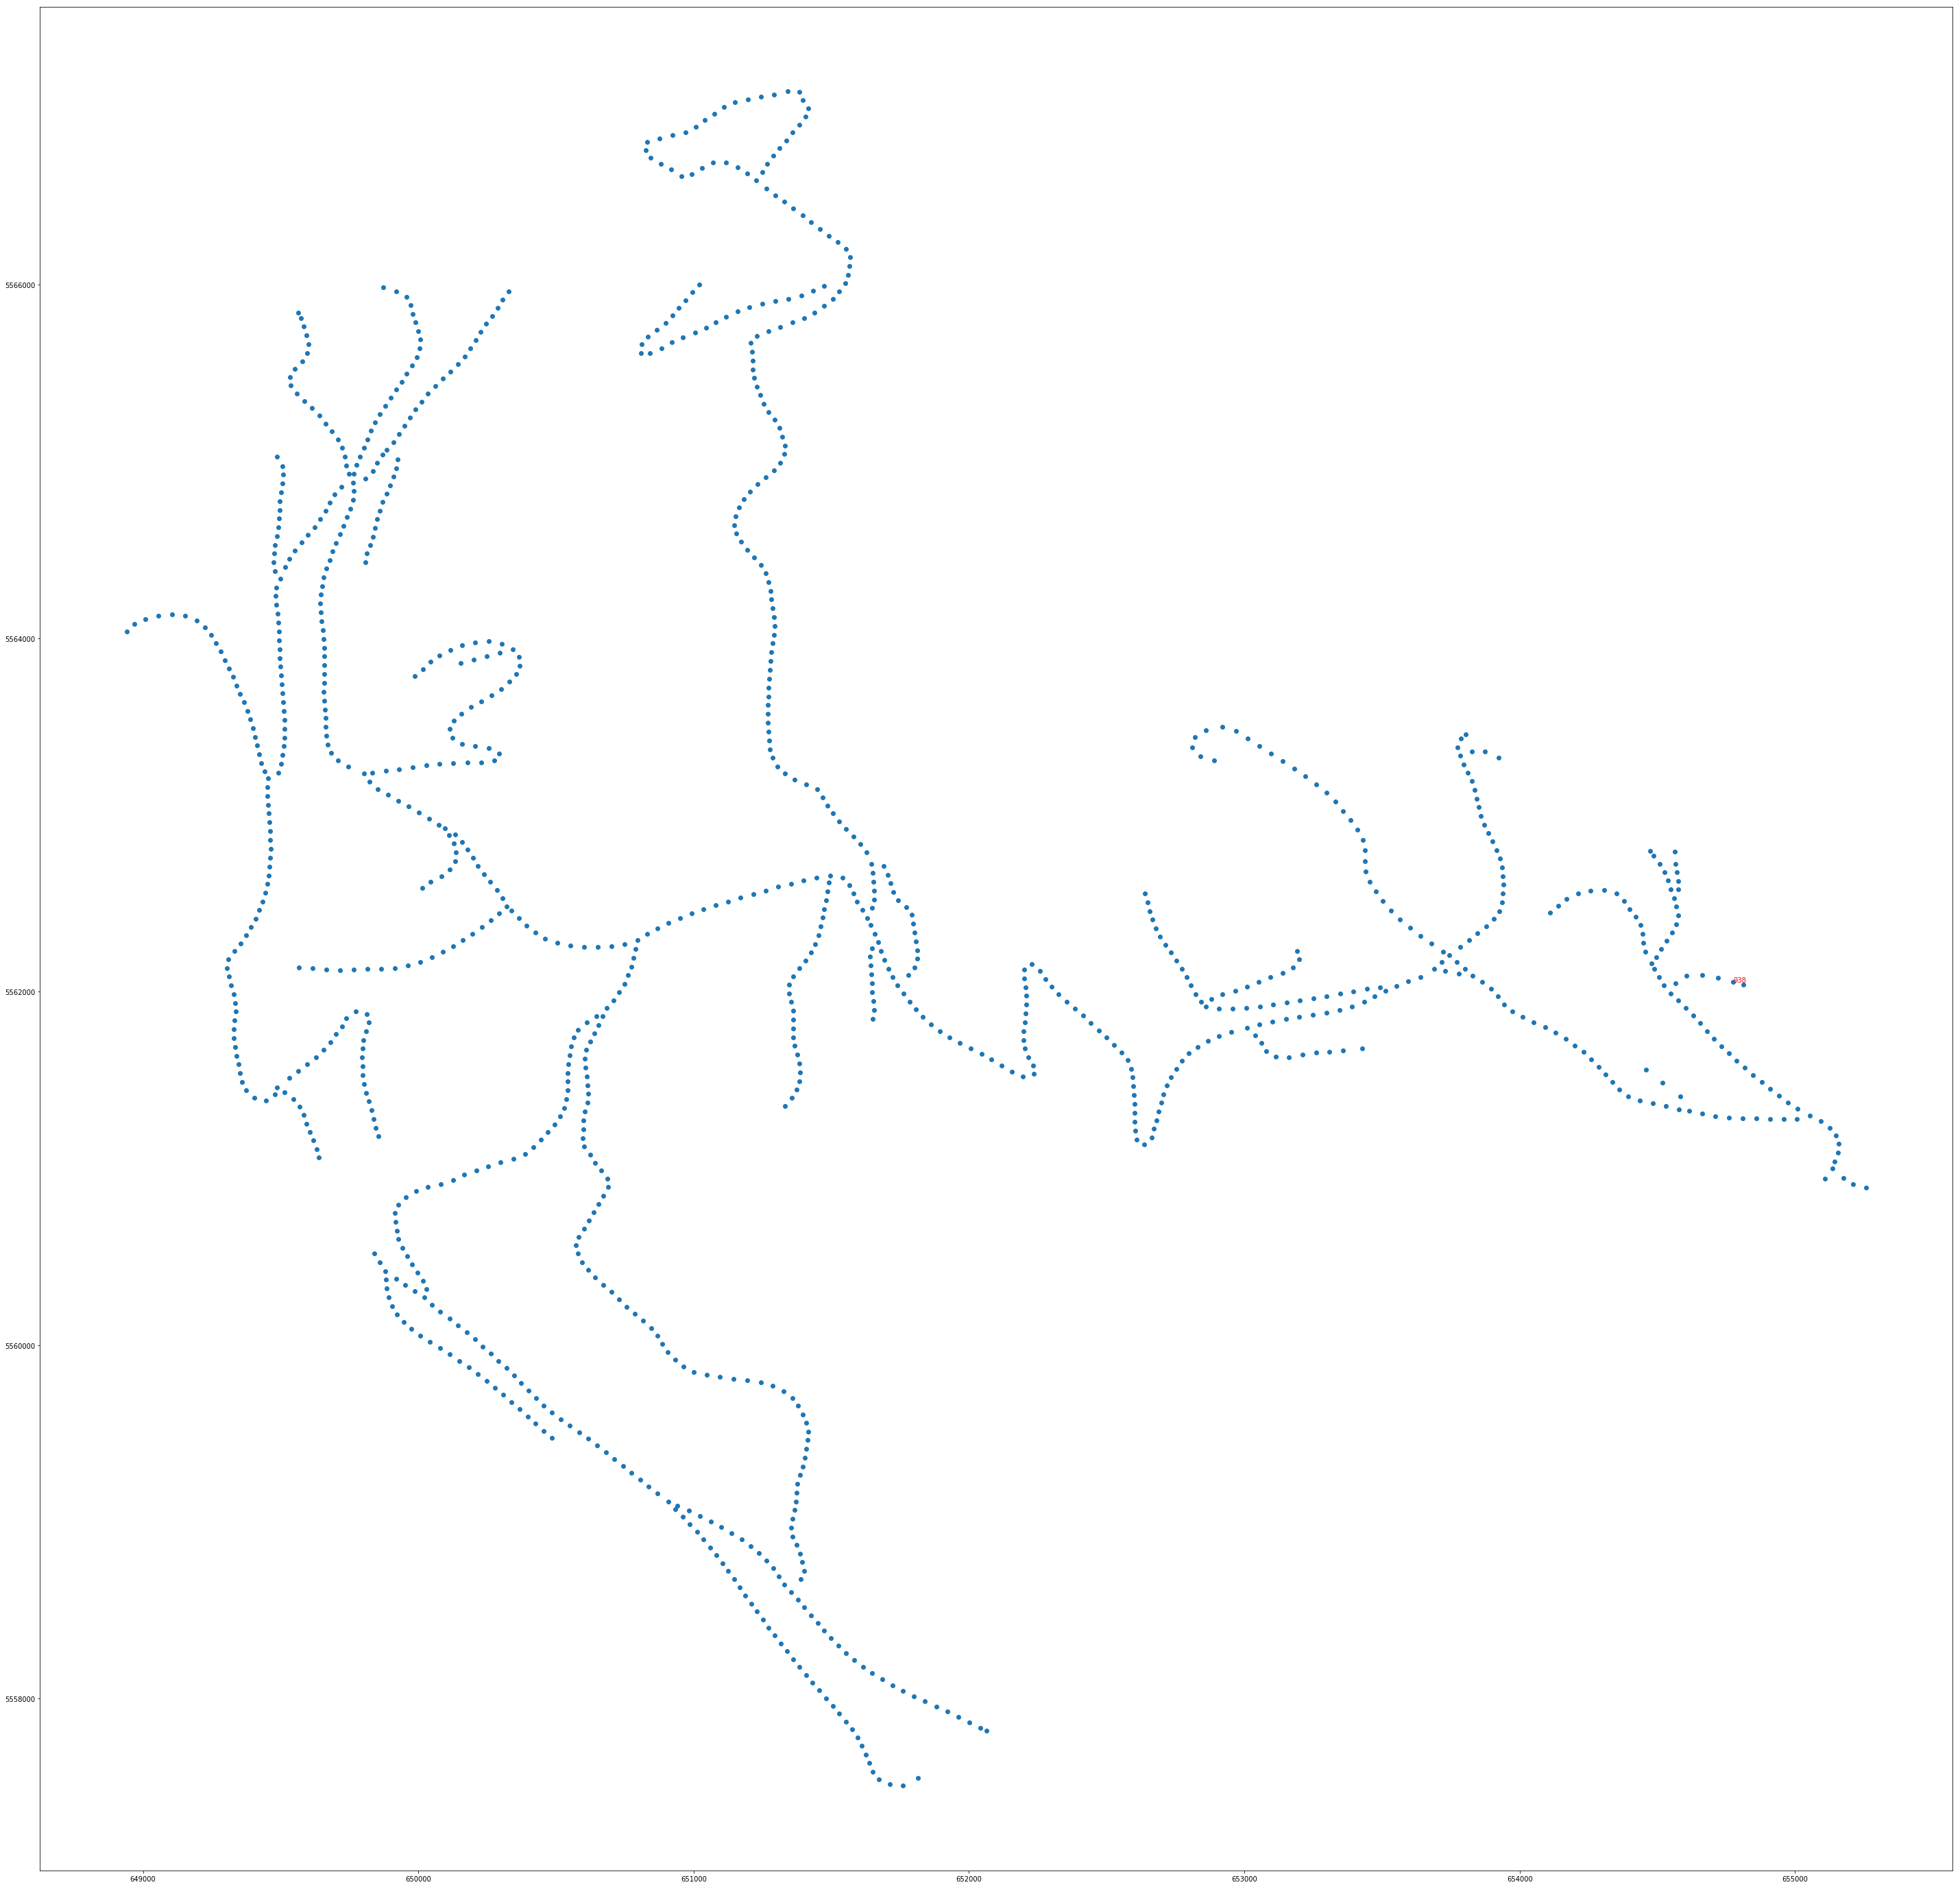

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50,50))
plt.scatter(nodes_df.x0,nodes_df.y0)
for index,row in nodes_df.iterrows():
    if row['index'] == 938:
        ax.annotate("{:.0f}".format(row['index']), (row.x0, row.y0),fontsize=10,color='red')
#    else:
#        ax.annotate("{:.0f}".format(row['index']), (row.x0, row.y0),fontsize=8)